## Vinay Kudari - 50365626

### Part - A

#### Discuss the Resilient Distributed Datasets in Spark and their significances. What is lazy evaluation in Spark?

Resilient Distributed Datasets (RDD) is the fundamental data structure of Spark. They are immutable collection of objects and any operation can be applied on the logical partitions on different nodes of cluster. Results after MAP phase are stored in RDD data structure. Some of the significances are listed below

- Fault Tolerant: RDD have the ability to recompute missing or damaged partitions due to node failures using lineage graph
- Distributed: Data is stored in multiple nodes and can be computed parallely
- In-Memory Computations: It stores intermediate results in distributed memory(RAM) instead of secondary storage which makes Spark way efficient than traditional Map Reduce. Making I/O operations execute faster

Lazy evaluation: Any operation on a RDD is not computed immediately, instead they store the sequential transformations which are needed to be applied and these operations will be applied when needed. The transformations are stored in a directed acyclic graph, and it only executed ones which makes the transformations fairly efficient

#### Differentiate Narrow Transformation and Wide Transformation? Explain with example. 

Narrow transformations: Transformations where the processing logic depends only the data residing on the partition and there is no dependency on the any other partitions hence there is no shuffling data across the nodes in the cluster

- Eg. If we want to filter all the words which has 'DIC' in them we call this operation as narrow operation as we just need only the words in the partition. This called a 'filter' operation. 

Wide transformations: Transformations where the processing logic depends on the data residing on multiple partitions distributed across worker nodes, this kind of operations requires data shuffling over the network

- Eg. If we want to generate counts of a word we might wanna use groupByKey() operation which needs data shuffling across nodes

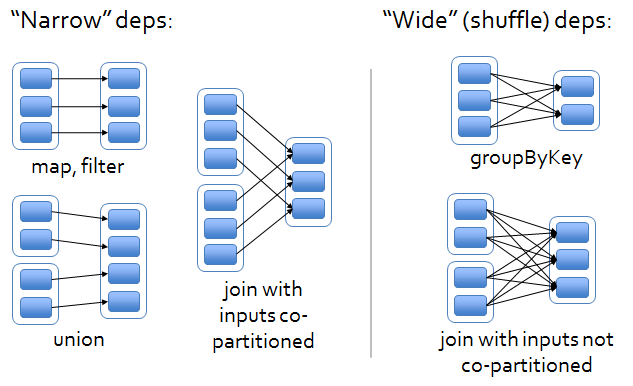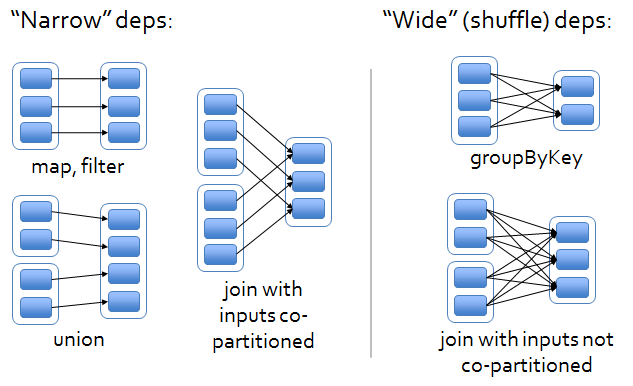

#### Define k-core subgraph. Discuss the interpretation of a k-core subgraph in the context of Community Analysis


A sub-graph is a maxiaml subgraph in which every vertex has degree at least k which means that it is connected to at least k other vertices of the sub graph. Equivalently, it is one of the connected components of the subgraph of a graph formed by repeatedly deleting all vertices of degree less than k. 

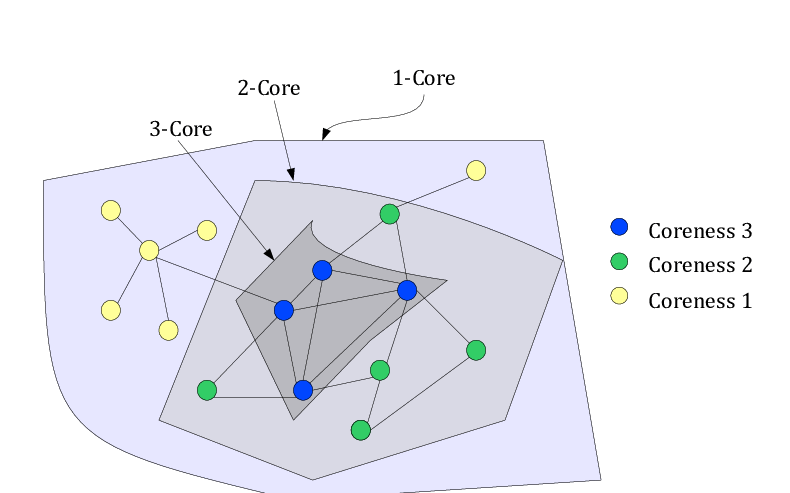

In the field of graph mining community analysis is a pivotal application which is being used in wide range of domains from social media analytics to transportation networks. The key concept in community analysis is that nodes within the same community are highly connected than with the nodes in other communities. In order to optimally detect a community with a graph we first reduce the whole graph to a K-core, then find the community structure in the K-core subgraph and use this community structure of K-core as initial value and find the community structure of the whole graph. The community structure is generally preserved in the k-core sub graph for reasonable values of K. Using K-core subgraph in comunity analysis makes the process efficient.

Ref: https://arxiv.org/pdf/1403.2226.pdf

#### Calculate Betweenness Centrality for Node C in the following graph. Show your work
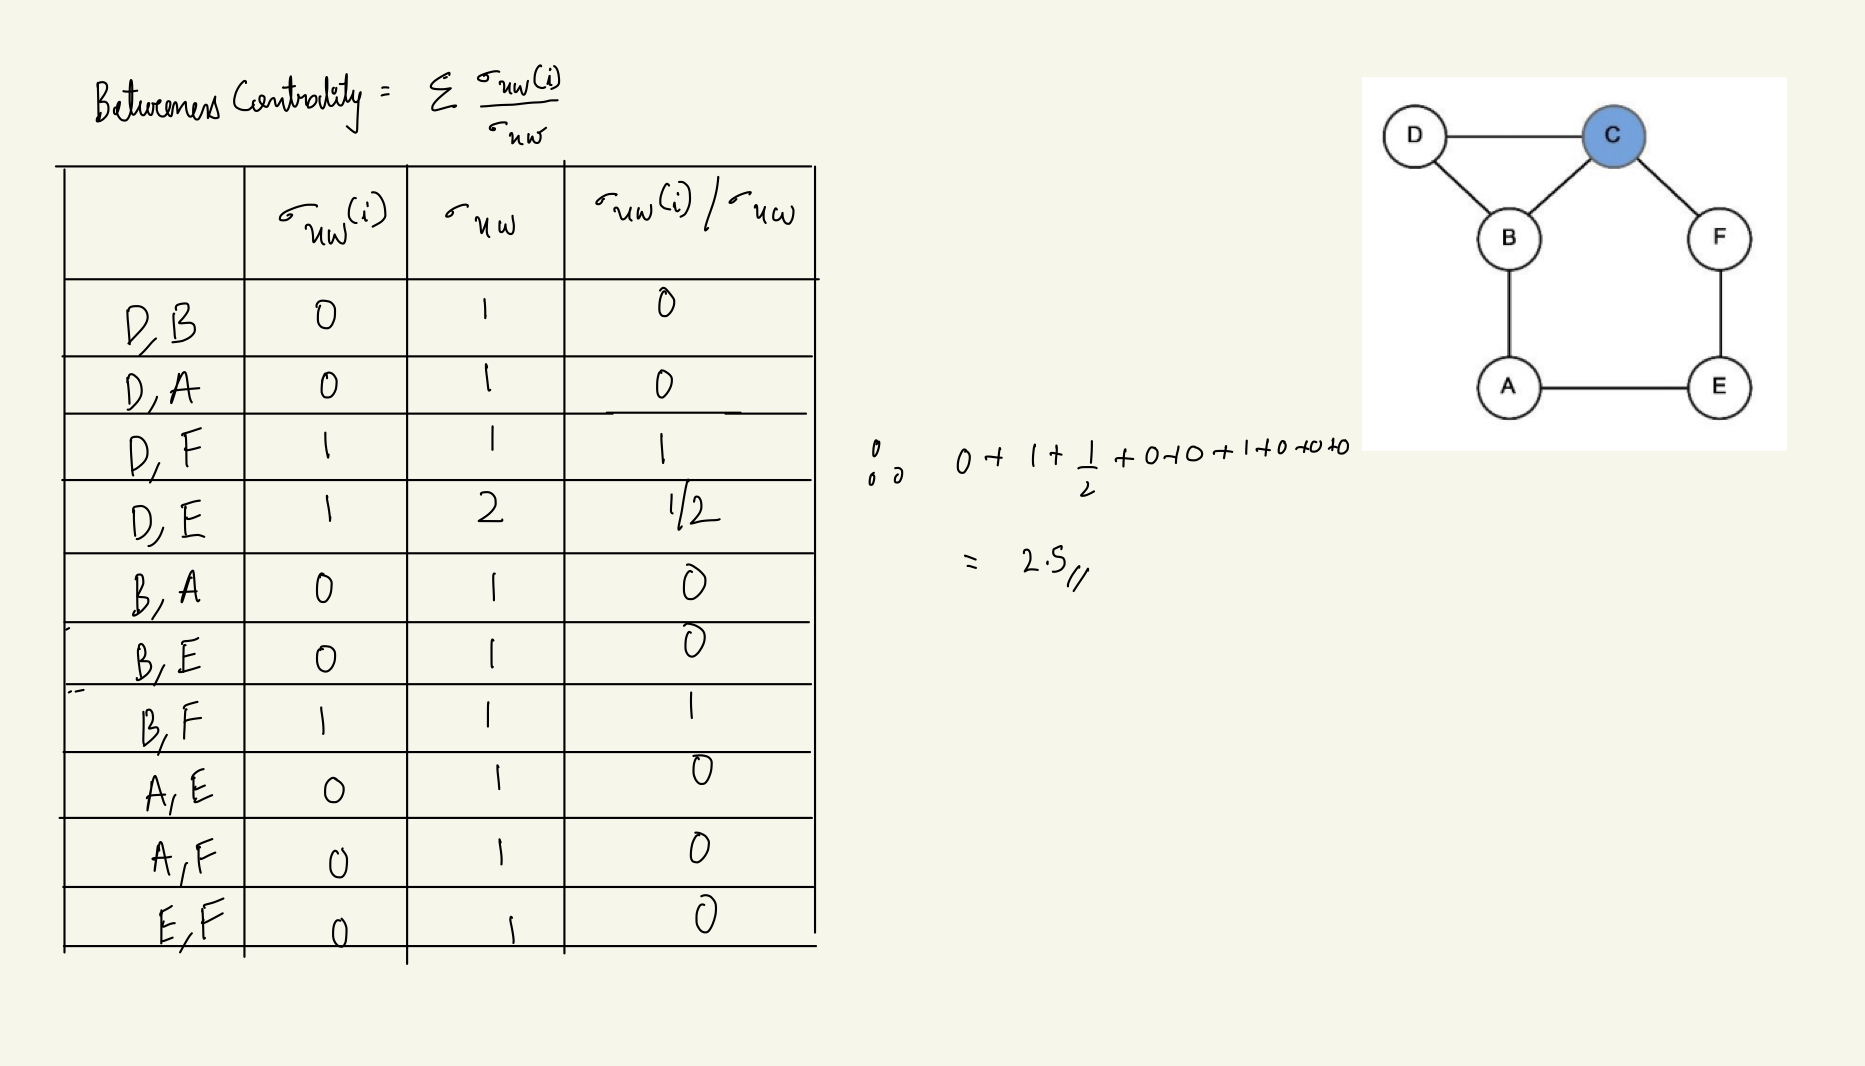


### Part - B

#### Code

#### Loading CSV and displaying the graph

```
LOAD CSV WITH HEADERS FROM "file:///GRAPH_DATA.csv" AS line
MERGE (n:VinayNode {name:line.Source})
MERGE (m:VinayNode {name:line.Target})
MERGE (n) -[:Vdist {cost:toInteger(line.distance)}]-> (m)
```

```
MATCH (n:VinayNode)-[r]->(m)
RETURN n,r,m
```

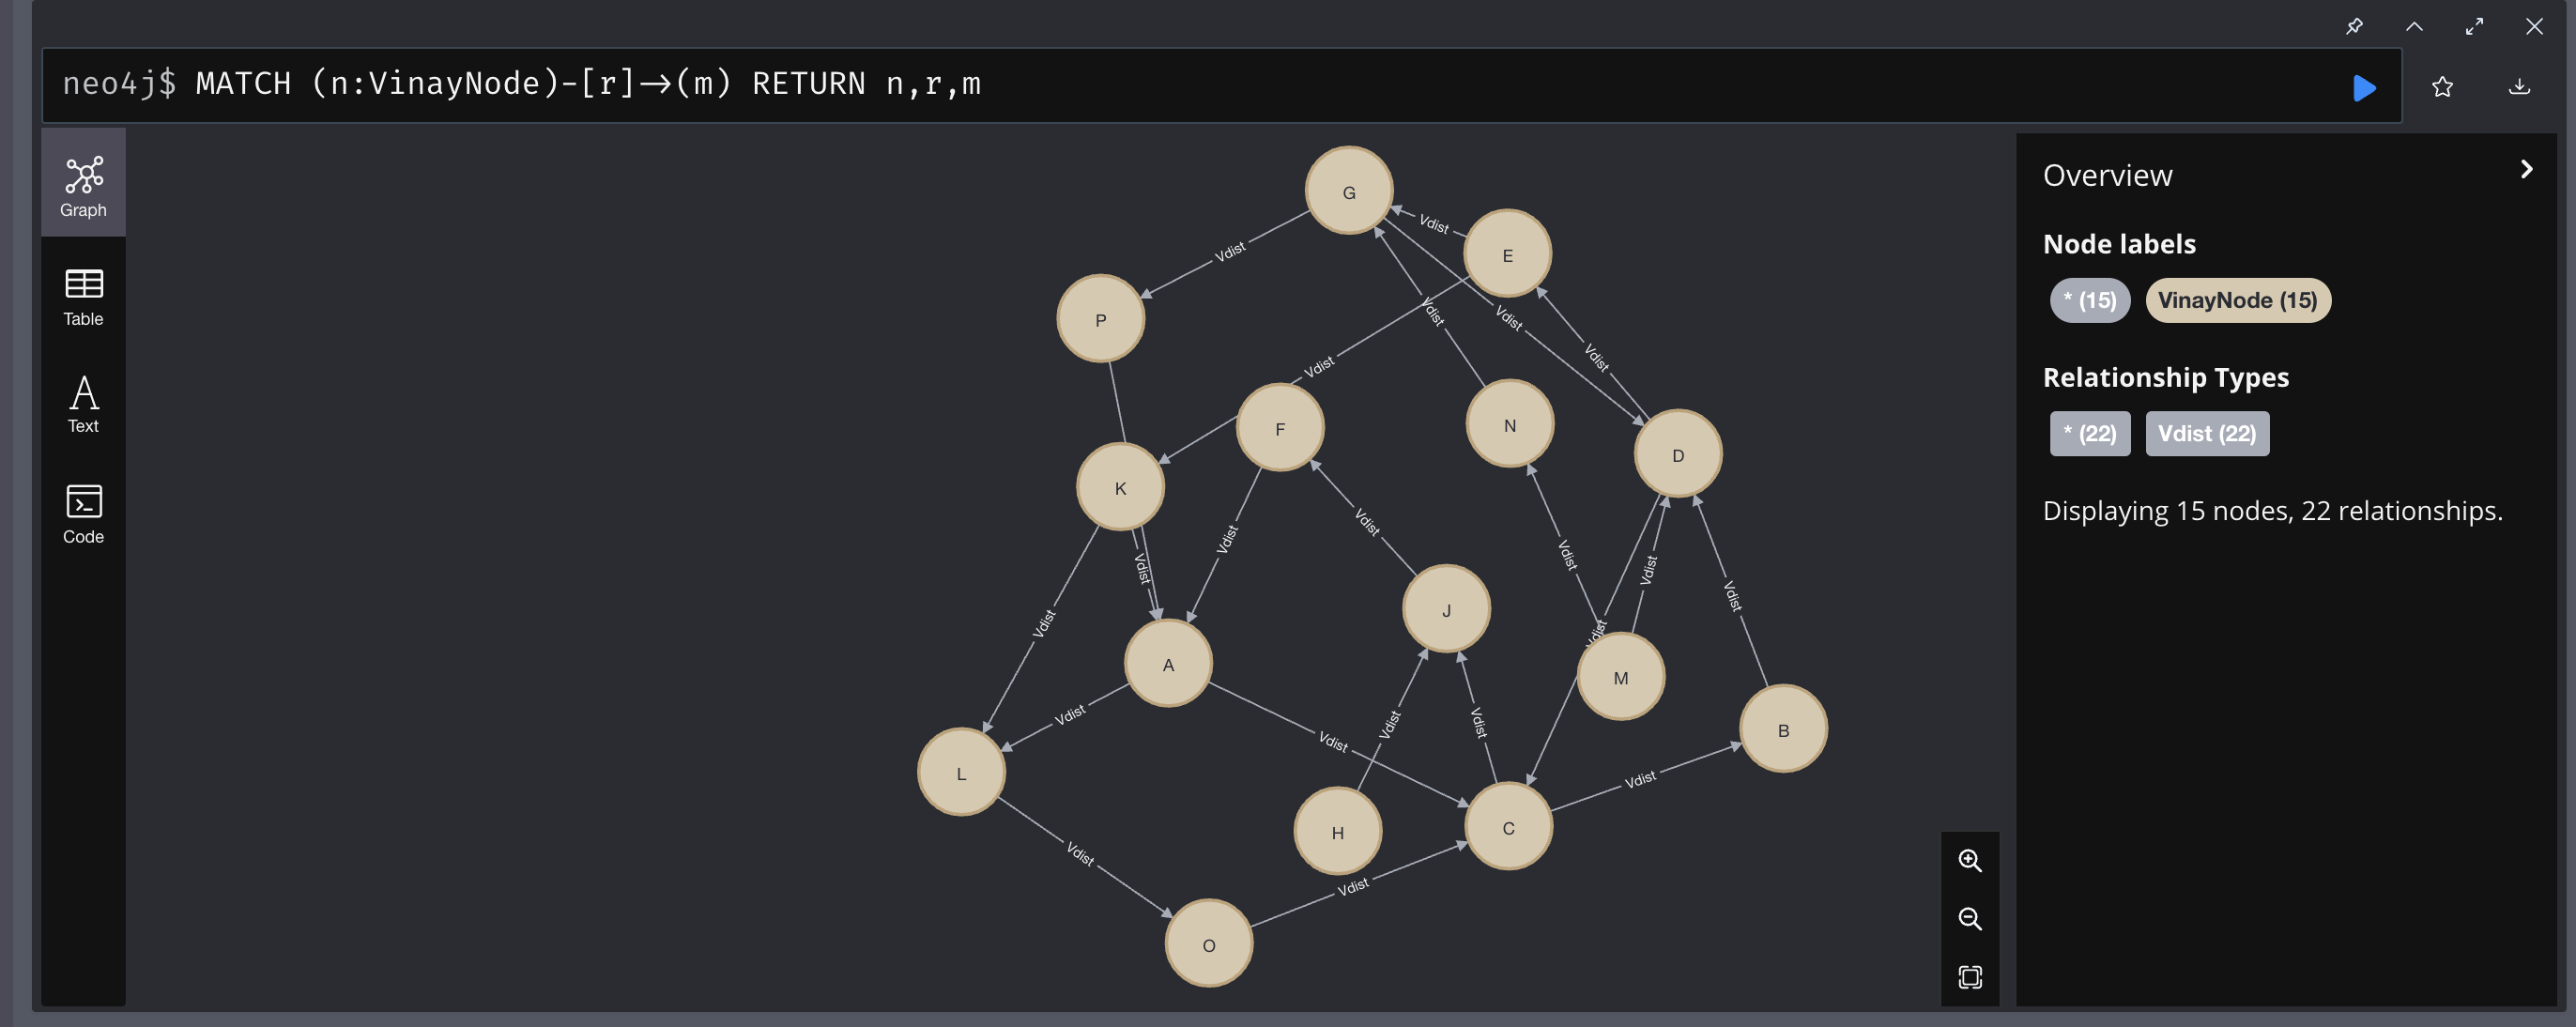

##### Dijkstra's Algorithm

```
CALL gds.graph.project(
'VinayGraph',
'VinayNode',
'Vdist',
 {
    relationshipProperties: 'cost'
 }
)
```

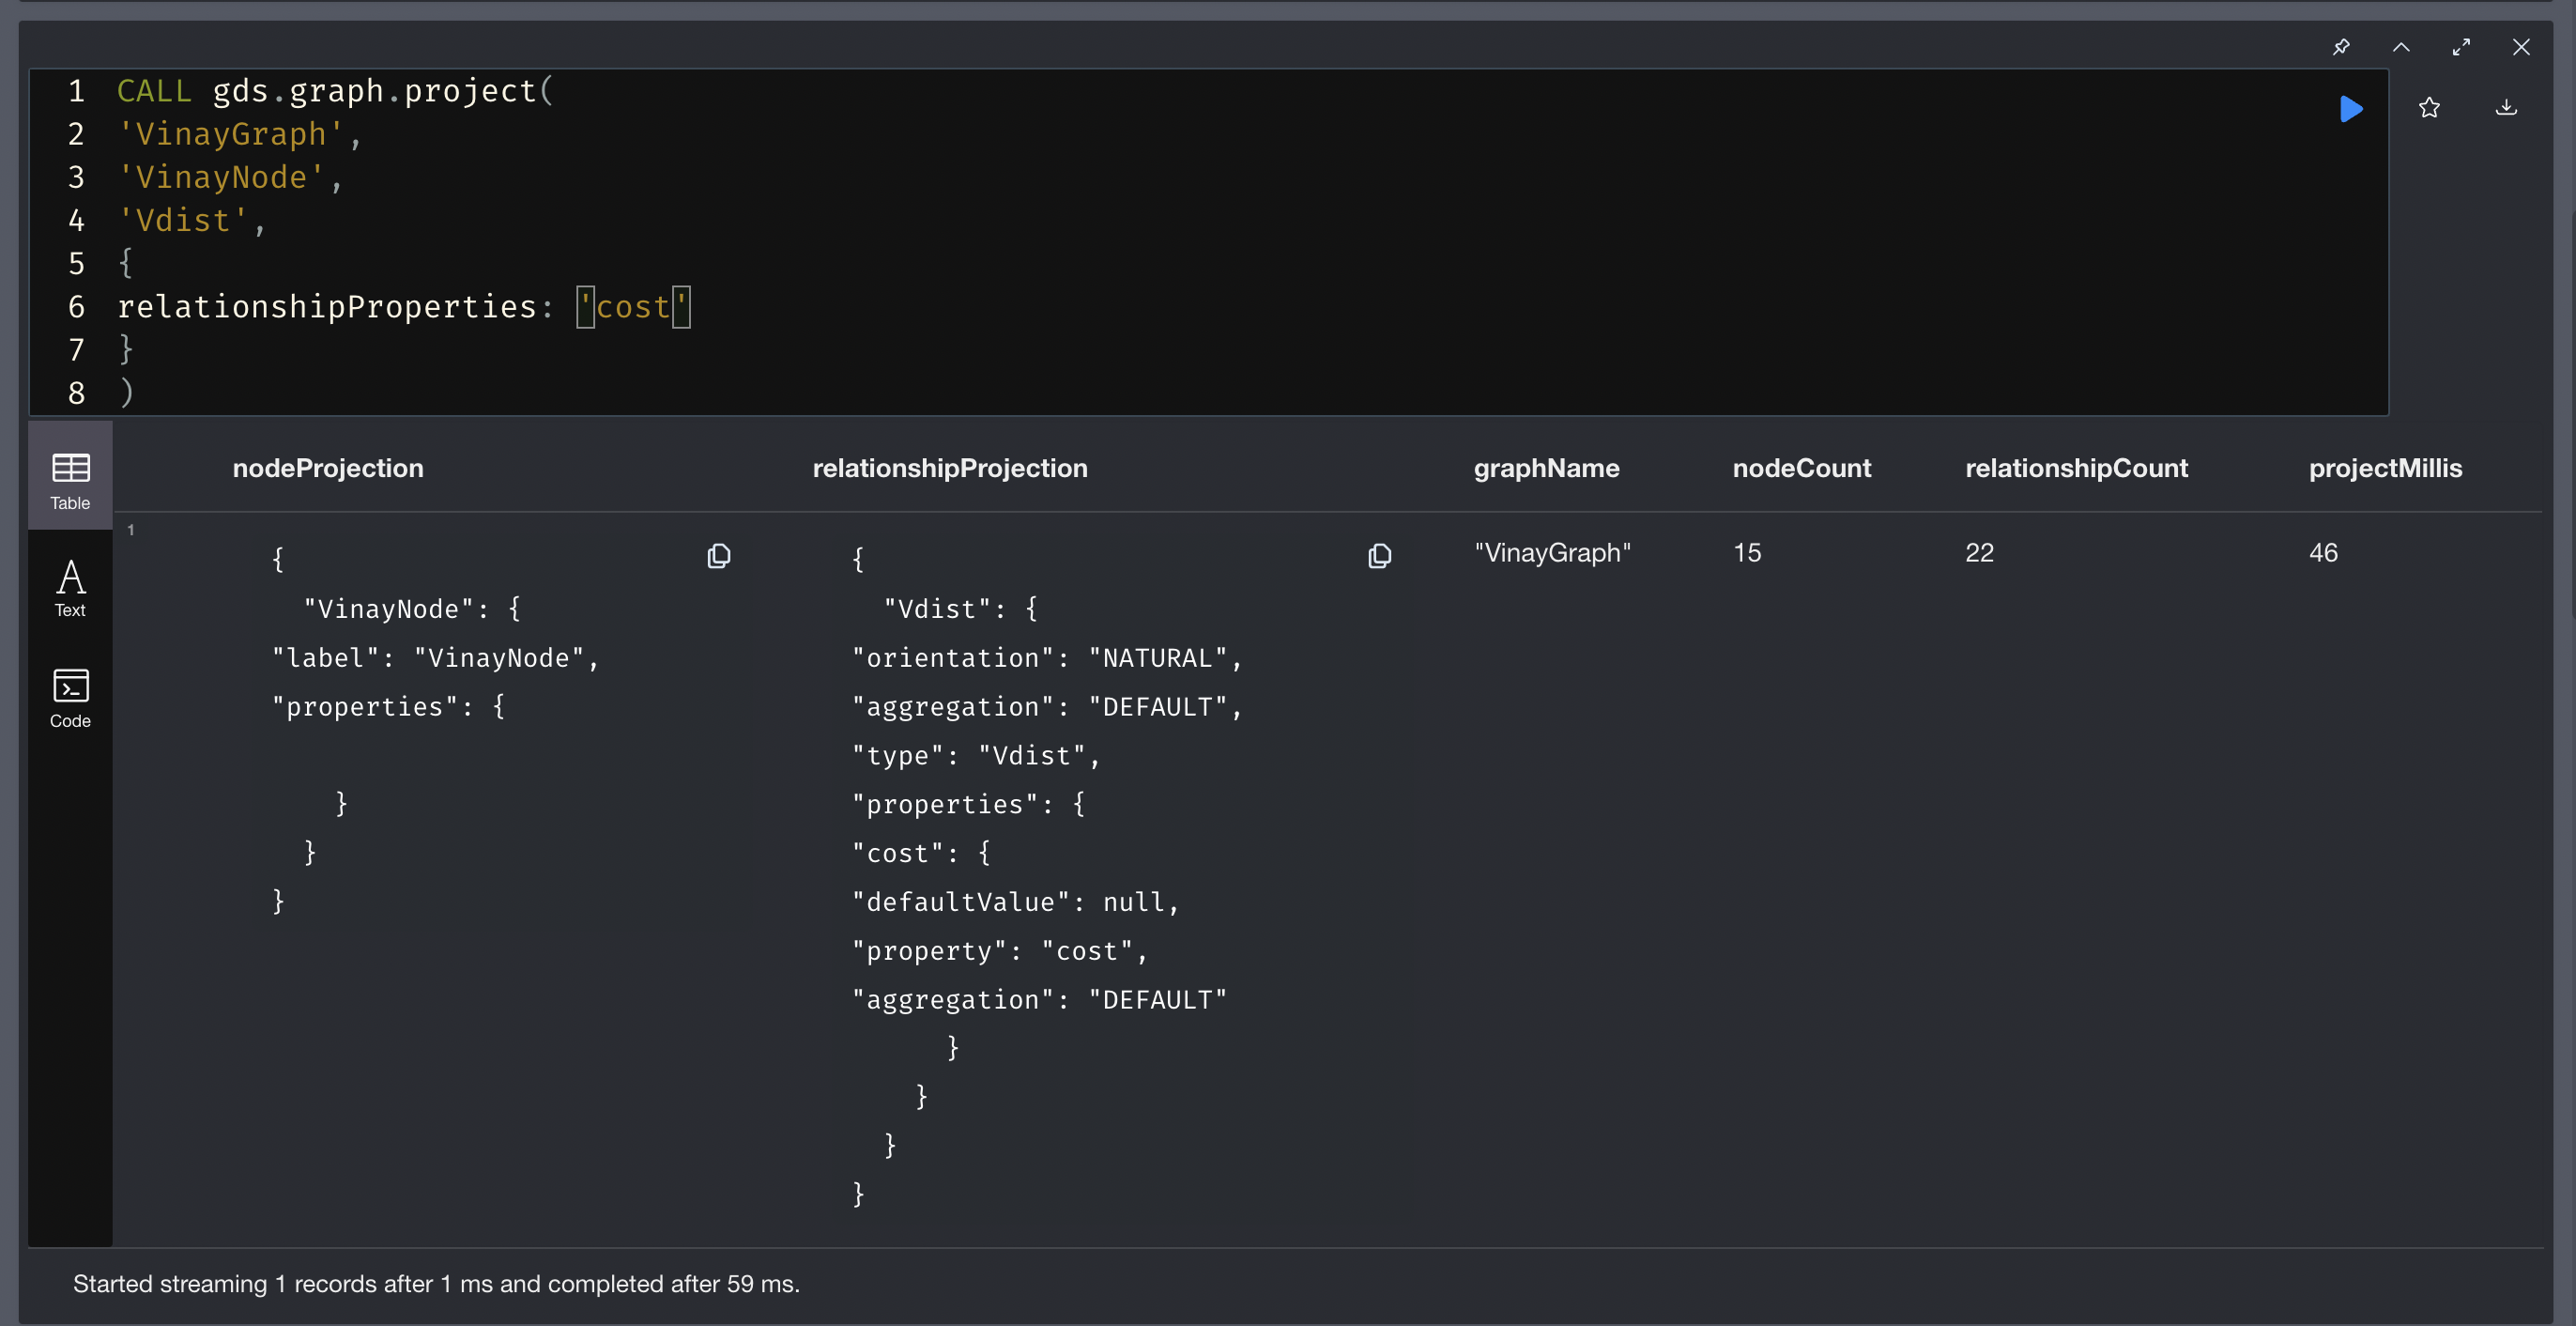



```
MATCH (source:VinayNode {name: 'N'}), (target:VinayNode {name: 'O'})
CALL gds.shortestPath.dijkstra.stream('VinayGraph', {
sourceNode: source,
targetNode: target,
relationshipWeightProperty: 'cost'
})
YIELD index, sourceNode, targetNode, totalCost, nodeIds, costs, path
RETURN
index,
gds.util.asNode(sourceNode).name AS sourceNodeName,
gds.util.asNode(targetNode).name AS targetNodeName,
totalCost,
[nodeId IN nodeIds | gds.util.asNode(nodeId).name] AS nodeNames,
costs,
nodes(path) as path
ORDER BY index
```


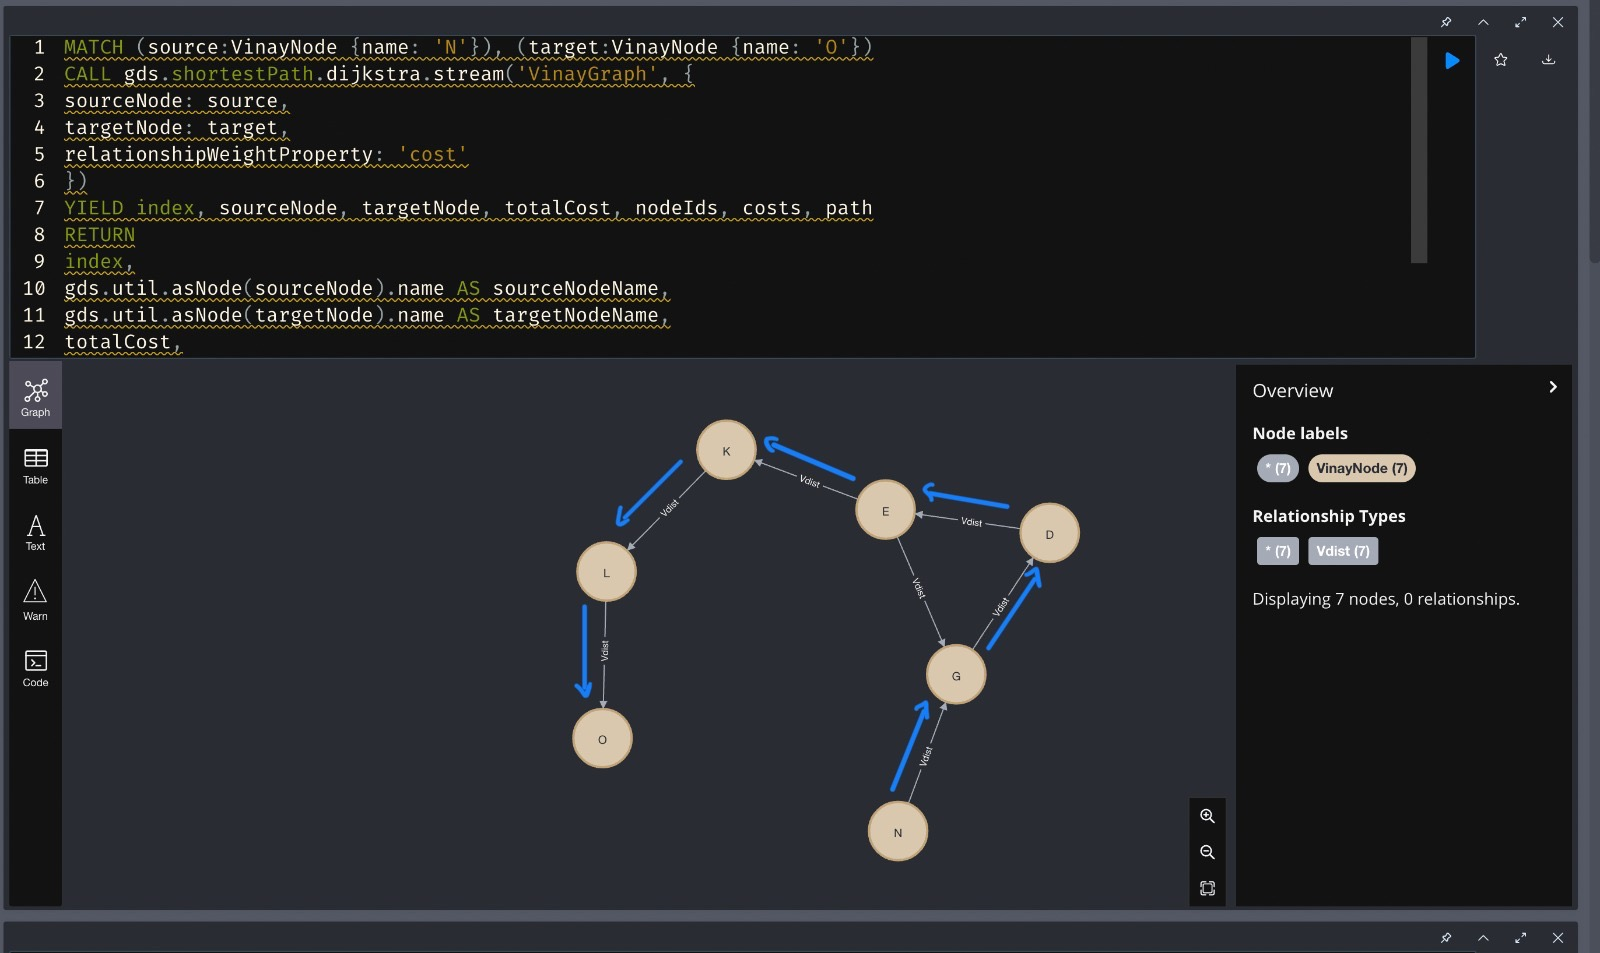

##### Shortest path
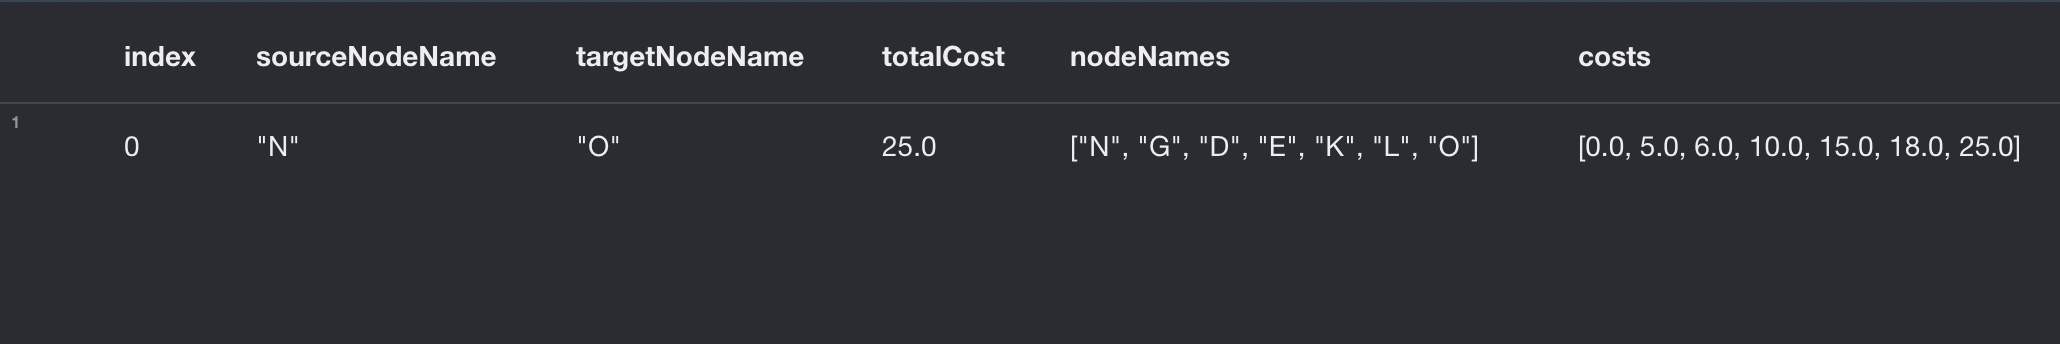

### Part - C

#### Abstract

In society today, most judgments are made on data rather than intuition; in this project, we investigated how to rank players based on their behaviors using data recorded by sensors during the game. These rankings are important for recruitment agencies since they must consider risk before spending a large sum of money on athletes. For example, a top player with a higher chance of injury might not be a suitable investment for a smaller club in need of a leader throughout the season. We've also demonstrated how typical statistical methods for evaluating performance have drawbacks.

Wyscout is the dataset that was used to do the above research; it contains data for every event in every game played since 2004. We started with raw Wyscount match event data and translated it to SPADL format, which is a standardized data format for soccer analytics. We also developed machine learning pipelines to estimate winning and conceding probabilities after doing comprehensive data analysis. We presented a method for generating a feature vector by concatenating the last few actions and then using that feature vector to calculate probability. Following that, we transmit the winning and conceding probabilities, as well as other player attributes, to the VEPA framework, which generates VEPA scores, which are then used to rank players.

#### My contributions

- Performed literature survey on related works and ideated the approach for our problem
- Performed data analysis specifically related to what happens between goals, ideated the concept of positive and negative actions
- Performed data visualizations capturing the statistics between goals
- Generated new features and a novel ratio concept which turned out to be the most important feature
- Created training pipelines to automatically process data, generate features and train ML models
- Wrote automated scripts to find the best parameters for ML models
- Generated feature importantance plots and contributed to making power point presentations for class presentations